Anggota Kelompok 4:


1.   Bisma Ridho Pambudi (10319002)
2.   Muhammad Ihsan Abdul Hakim (10320011)
2.   Naufal Rafif Kusumawardhana (10320038)
4.   Ferry Yap (10320019)
5.   Daanish E.A.K.M (10320005)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1'></a><br>
# Load and Check Data

In [2]:
df= pd.read_csv("star_classification.csv")

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

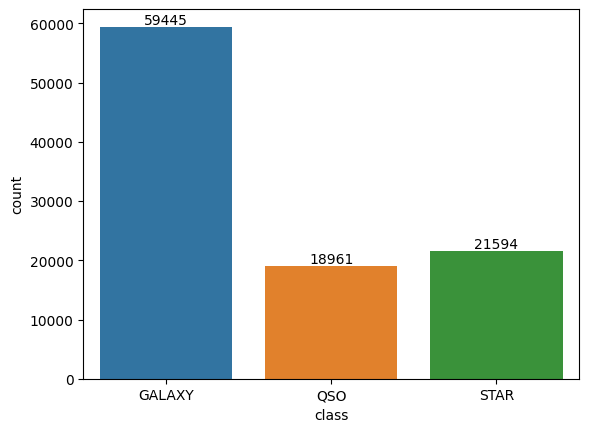

In [ ]:
ax=sns.countplot(x=df["class"]);
ax.bar_label(ax.containers[0]);

In [4]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "QSO" else 2 for i in df["class"]]

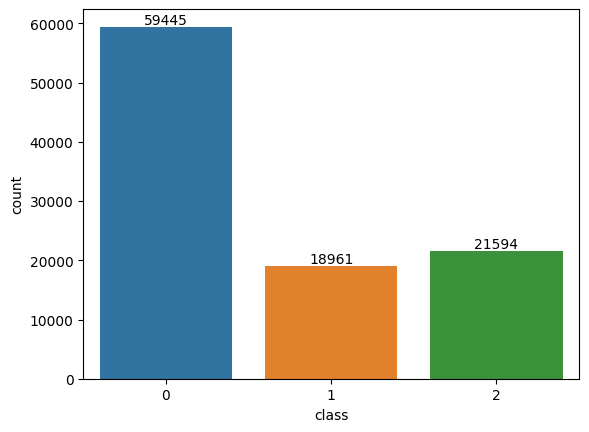

In [5]:
ax=sns.countplot(x=df["class"]);
ax.bar_label(ax.containers[0]);

<a id='2'></a><br>
# Deteksi Outliers

Banyaknya data tersebut diprediksi terdapat data anomali yang mampu membuat persimpangan data ekstrim

In [6]:
from sklearn.neighbors import LocalOutlierFactor
out = LocalOutlierFactor()
y_pred = out.fit_predict(df) 

In [7]:
x_score = out.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filter2 = outlier_score["score"] < threshold2
outlier = outlier_score[filter2].index.tolist()

In [8]:
len(outlier)

15256

In [9]:
df.drop(outlier, inplace=True)

<a id='3'></a><br>
# Seleksi Fitur yang Berpengaruh

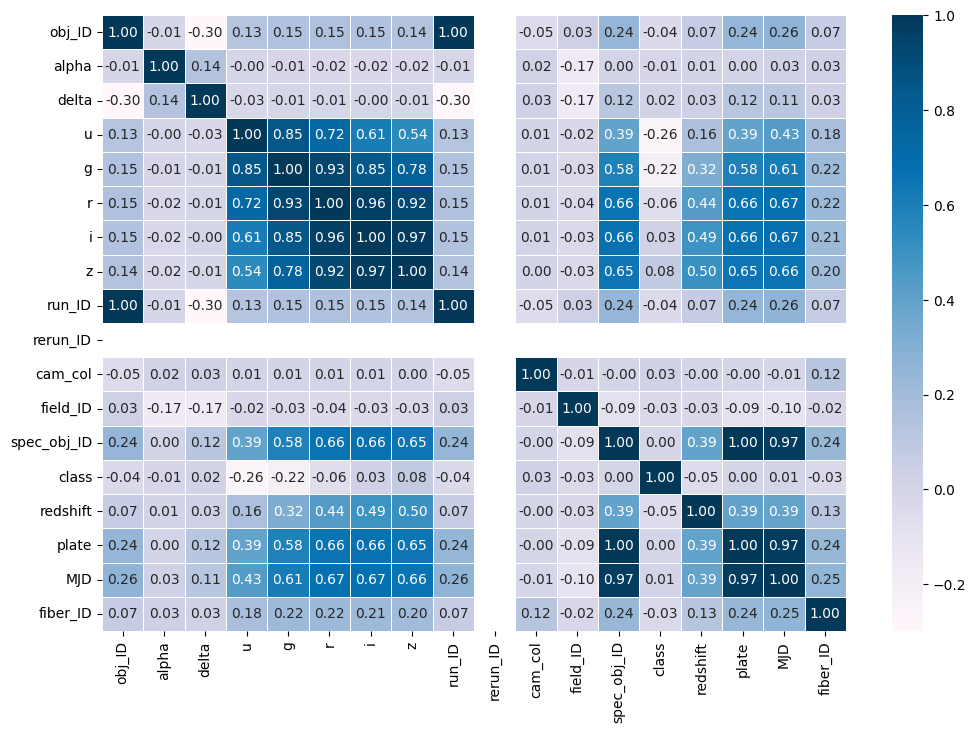

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [10]:
corr = df.corr()

In [11]:
corr["class"].sort_values()

u             -0.263310
g             -0.216012
r             -0.061318
redshift      -0.045683
run_ID        -0.035732
obj_ID        -0.035729
field_ID      -0.032323
fiber_ID      -0.031727
alpha         -0.013221
spec_obj_ID    0.000059
plate          0.000060
MJD            0.007185
delta          0.015855
cam_col        0.030236
i              0.030689
z              0.081337
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Kolom-kolom pada *dataframe* terdiri atas beragam komponen yang dapat dianalisis lebih lanjut. Kolom 'u', 'g', 'r', 'i', dan 'z' menyatakan filter pada berbagai panjang gelombang (dari ultraviolet menuju merah serta infra-merah). Adapula kolom 'alpha' dan 'delta' menyatakan koordinat posisi objek serta ada kolom 'Class' menyatakan klasifikasi objek terbagi atas 3 jenis; Galaksi, Bintang, dan QSO (*Quasi-Stellar Object*).

Berdasarkan seleksi, kolom 'u', 'g', 'r' menjadi jenis kolom yang paling memengaruhi data. Sehingga pada analisis machine learning nantinya, Data ini yang akan di-*train*.

<a id='4'></a><br>
# Mengatasi Data yang Imbalance

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
x = df[['u','g']]
y = df.loc[:,'class'].values

In [ ]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 2: 17890, 1: 16159})
Resampled dataset shape Counter({0: 50695, 1: 50695, 2: 50695})


<a id='5'></a><br>
# Standarisasi Skala

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [18]:
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn import svm #SVM
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay # confusion matrix

<a id='7'></a><br>
# Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Klasifikasi KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p = 1 is manhattan distance, p = 2 is Euclidean
KNN.fit(x_train, y_train)
predictedKNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))



Accuracy : 0.721


<a id='10'></a><br>
### Matrix Confusion

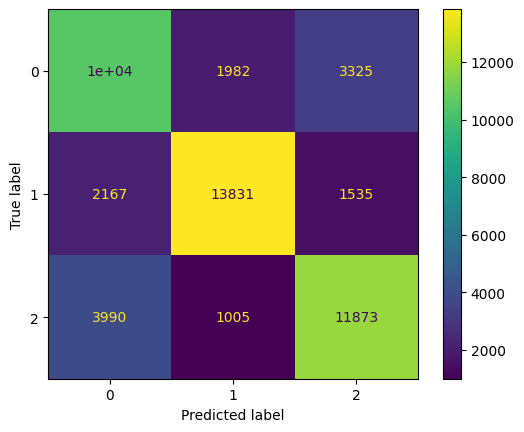

In [ ]:
KNN_cm = confusion_matrix(predictedKNN,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=KNN_cm)
disp.plot()
plt.show()

<a id='11'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predictedKNN))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65     16638
           1       0.79      0.82      0.81     16818
           2       0.70      0.71      0.71     16733

    accuracy                           0.72     50189
   macro avg       0.72      0.72      0.72     50189
weighted avg       0.72      0.72      0.72     50189



# Klasifikasi Naive Bayes

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
predictedNB = NaiveBayes.predict(x_test)
score = NaiveBayes.score(x_test, y_test)
NB_score_ = np.mean(score)
print('Accuracy : %.3f' % (NB_score_))

Accuracy : 0.556


<a id='10'></a><br>
### Matrix Confusion

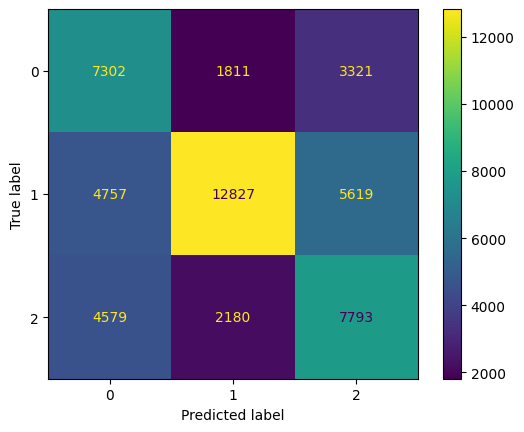

In [ ]:
NB_cm = confusion_matrix(predictedNB,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=NB_cm)
disp.plot()
plt.show()

<a id='11'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predictedNB))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50     16638
           1       0.55      0.76      0.64     16818
           2       0.54      0.47      0.50     16733

    accuracy                           0.56     50189
   macro avg       0.56      0.56      0.55     50189
weighted avg       0.56      0.56      0.55     50189



# Klasifikasi Decision Trees

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion='entropy', random_state=0)
DecisionTree.fit(x_train, y_train)
predictedDT = DecisionTree.predict(x_test)
score = NaiveBayes.score(x_test, y_test)
DT_score_ = np.mean(score)
print('Accuracy : %.3f' % (DT_score_))

Accuracy : 0.556


<a id='10'></a><br>
### Matrix Confusion

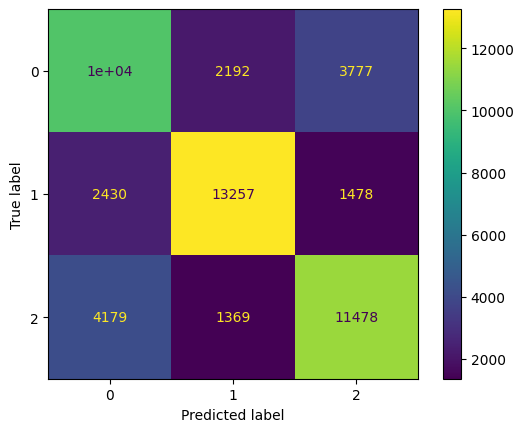

In [ ]:
DT_cm = confusion_matrix(predictedDT,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=DT_cm)
disp.plot()
plt.show()

<a id='11'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predictedDT))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61     16638
           1       0.77      0.79      0.78     16818
           2       0.67      0.69      0.68     16733

    accuracy                           0.69     50189
   macro avg       0.69      0.69      0.69     50189
weighted avg       0.69      0.69      0.69     50189



<a id='9'></a><br>
## Klasifikasi SVM

In [ ]:
svm_klasifikasi = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_klasifikasi.fit(x_train,y_train)
predictedS = svm_klasifikasi.predict(x_test)
score = svm_klasifikasi.score(x_test, y_test)
svm_score_ = np.mean(score)
print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.667


In [ ]:
svm1_klasifikasi = svm.SVC(kernel='poly', C=1, random_state=0)
svm1_klasifikasi.fit(x_train,y_train)
predictedS1 = svm1_klasifikasi.predict(x_test)
score = svm1_klasifikasi.score(x_test, y_test)
svm1_score_ = np.mean(score)
print('Accuracy : %.3f' % (svm1_score_))

Accuracy : 0.471


<a id='10'></a><br>
### Matrix Confusion

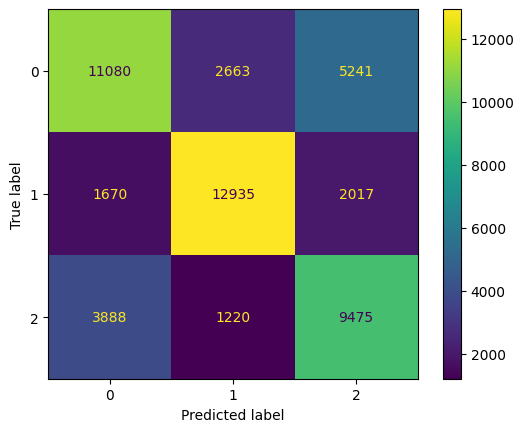

In [ ]:
svm_cm = confusion_matrix(predictedS,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
disp.plot()
plt.show()

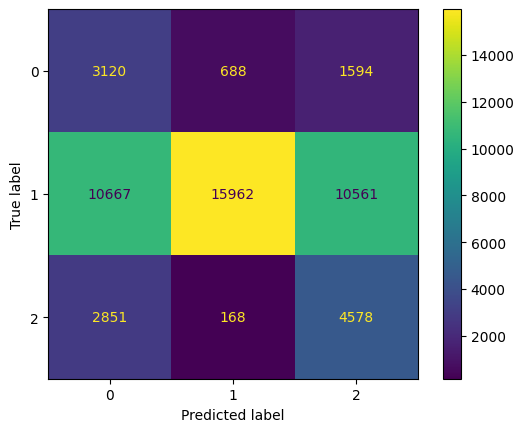

In [ ]:
svm1_cm = confusion_matrix(predictedS1,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=svm1_cm)
disp.plot()
plt.show()

<a id='11'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predictedS))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62     16638
           1       0.78      0.77      0.77     16818
           2       0.65      0.57      0.61     16733

    accuracy                           0.67     50189
   macro avg       0.67      0.67      0.67     50189
weighted avg       0.67      0.67      0.67     50189



In [ ]:
print(classification_report(y_test, predictedS1))

              precision    recall  f1-score   support

           0       0.58      0.19      0.28     16638
           1       0.43      0.95      0.59     16818
           2       0.60      0.27      0.38     16733

    accuracy                           0.47     50189
   macro avg       0.54      0.47      0.42     50189
weighted avg       0.54      0.47      0.42     50189



<a id='14'></a><br>
## Klasifikasi RF

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predictedRF = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))


Accuracy : 0.739


<a id='15'></a><br>
### Matriks Confusion

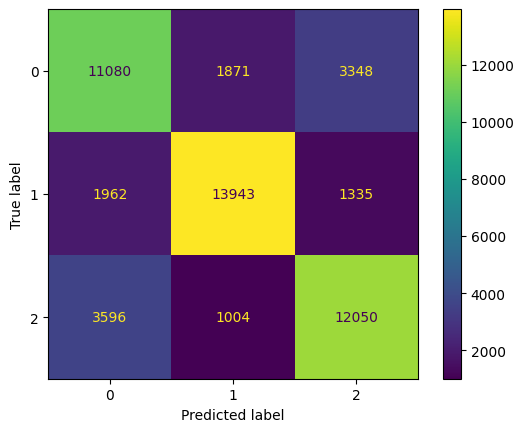

In [ ]:
RF_cm = confusion_matrix(predictedRF,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm)
disp.plot()
plt.show()

<a id='16'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predictedRF))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67     16638
           1       0.81      0.83      0.82     16818
           2       0.72      0.72      0.72     16733

    accuracy                           0.74     50189
   macro avg       0.74      0.74      0.74     50189
weighted avg       0.74      0.74      0.74     50189



# Plot KNN


<ipython-input-45-40f057e5809f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


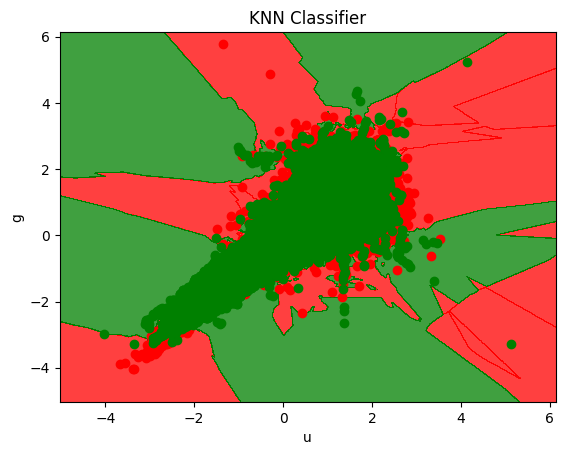

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, KNN.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('KNN Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

# Plot DT


<ipython-input-46-c779ee74c07d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


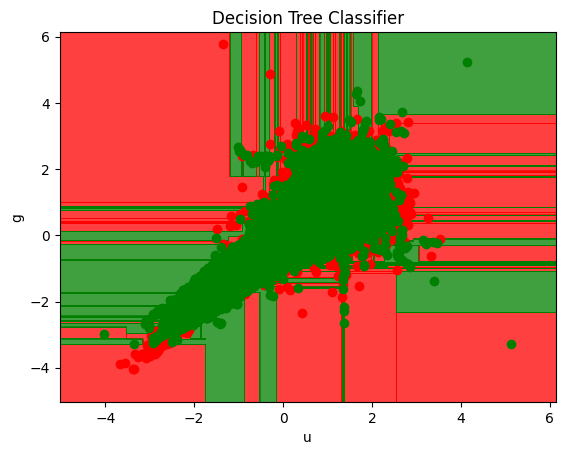

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, DecisionTree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

# Plot SVM


<ipython-input-52-d16be465778b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


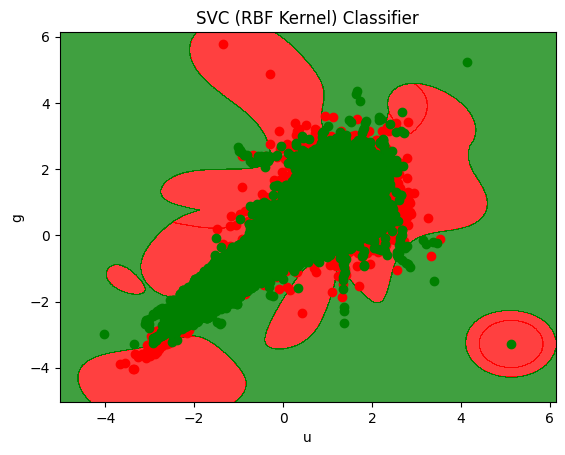

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, svm_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (RBF Kernel) Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

<ipython-input-42-47a2ad6cee98>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


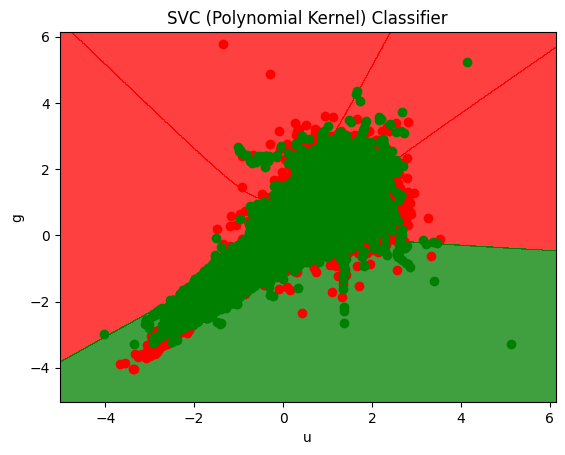

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, svm1_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

# Plot NB


<ipython-input-47-9285bc6f1b86>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


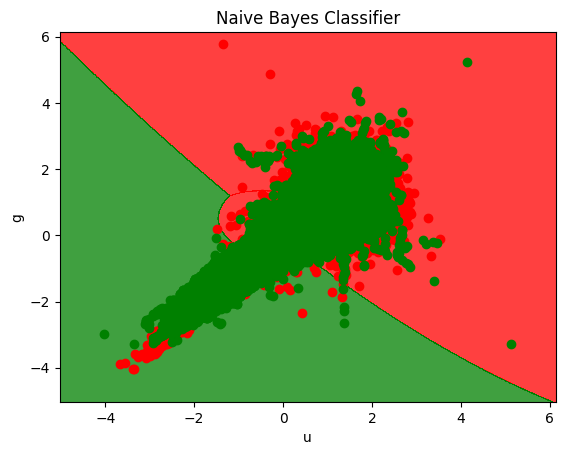

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, NaiveBayes.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

# Plot RF


<ipython-input-48-71c142a84bfc>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


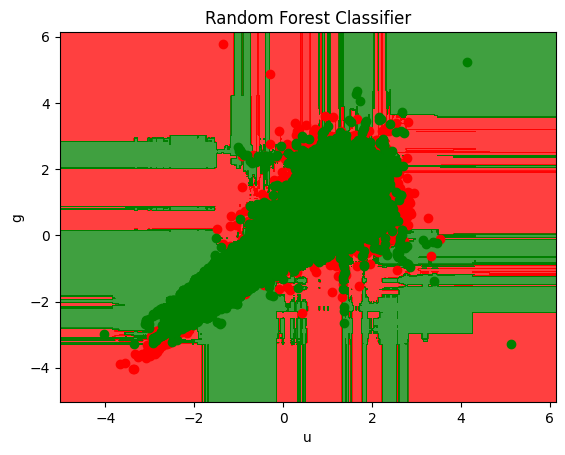

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, r_forest.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Random Forest Classifier')
plt.xlabel('u')
plt.ylabel('g')
plt.show()

# Analisis Awal


- Metode yang dapat digunakan untuk mengklasifikasi dataset star_classification.csv adalah klasifikasi SVM, DT, RF, KNN, dan Naive-Bayes
- Menurut hasil diatas metode klasifikasi yang paling cocok untuk mengklasifikasi dataset pada star_classification.csv adalah metode klasifikasi KNN dan RF karena tingkat akurasinya yang relatif lebih tinggi dibandingkan dengan metode-metode lainnya dengan akurasi KNN sebesar 72,1% dan akurasi RF sebesar 73,9%

Mari tinjau dengan menyatakan variabel x ialah seluruh kolom kecuali kolom 'Class'

In [13]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [14]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 2: 17890, 1: 16159})
Resampled dataset shape Counter({0: 50695, 1: 50695, 2: 50695})


In [17]:
scaler.fit(x)
x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

Akurasi KNN

In [19]:
KNN.fit(x_train, y_train)
predictedKNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy KNN : %.3f' % (KNN_score_))

Accuracy KNN : 0.933


Akurasi Naive Bayes

In [20]:
NaiveBayes.fit(x_train, y_train)
predictedNB = NaiveBayes.predict(x_test)
score = NaiveBayes.score(x_test, y_test)
NB_score_ = np.mean(score)
print('Accuracy Naive Bayes : %.3f' % (NB_score_))

Accuracy Naive Bayes : 0.902


Akurasi Decision Tree

In [21]:
DecisionTree.fit(x_train, y_train)
predictedDT = DecisionTree.predict(x_test)
score = NaiveBayes.score(x_test, y_test)
DT_score_ = np.mean(score)
print('Accuracy : %.3f' % (DT_score_))

Accuracy : 0.902


Akurasi SVM

In [22]:
svm_klasifikasi.fit(x_train,y_train)
predictedS = svm_klasifikasi.predict(x_test)
score = svm_klasifikasi.score(x_test, y_test)
svm_score_ = np.mean(score)
print('Accuracy SVM RBF: %.3f' % (svm_score_))

svm1_klasifikasi.fit(x_train,y_train)
predictedS1 = svm1_klasifikasi.predict(x_test)
score = svm1_klasifikasi.score(x_test, y_test)
svm1_score_ = np.mean(score)
print('Accuracy SVM Poly: %.3f' % (svm1_score_))

Accuracy SVM RBF: 0.970
Accuracy SVM Poly: 0.945


Akurasi Random Forest

In [23]:
r_forest.fit(x_train,y_train)
predictedRF = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy RF: %.3f' % (rf_score_))

Accuracy RF: 0.983


# Analisis Akhir


- Menurut hasil diatas metode klasifikasi yang paling cocok untuk mengklasifikasi dataset pada star_classification.csv adalah metode klasifikasi Random Forest dengan akurasinya mencapai 98,3%


*Pengerjaan Colaboratory*
https://colab.research.google.com/drive/1YUqCCf5o9tsu2s8ROJ8JoMhoPgXAtKUl?usp=sharing